# Prepare Data

## Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [8]:
import pandas as pd

import matplotlib.pyplot as plot
%matplotlib inline

In [9]:
# read from CSV file and construct the Data Frame
df = pd.read_csv('data/pima-data.csv')
df.shape

(768, 10)

In [10]:
df.head(8)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False


Feature | Description
--|--
num_preg | number of pregnancies
glucose_conc | Plasma glucose concentration a 2 hours in an oral glucose tolerance test
diastolic_bp | Diastolic blood pressure (mm Hg)
thickness | Triceps skin fold thickness (mm)
insulin | 2-Hour serum insulin (mu U/ml)
bmi | Body mass index (weight in kg/(height in m)^2)
diab_pred | Diabetes pedigree function
Age | Age (years)
skin | What is this?
diabetes | Class variable (1=True, 0=False)


In [11]:
# is any value null?
df.isnull().values.any()

False

In [25]:
def plot_correlations(df, size=12):
    """
    Function plots a graphical correlation matrix for each pair of columns in the data frame.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()  # data frame correlation function
    fig, ax = plot.subplots(figsize=(size, size))
    ax.matshow(corr)  # color code the rectangles by correlation value
    plot.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plot.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


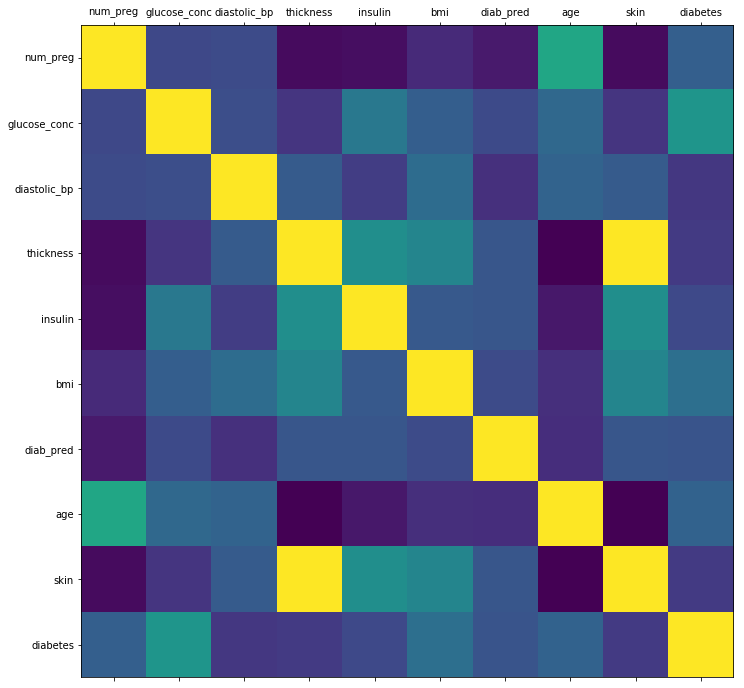

In [26]:
plot_correlations(df)

There is a strong correlation between _thickness_ and _skin_ values.
In fact, they both represent the same data.